In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

---

In [29]:
# McCormick function
def f(x, y):
    return np.sin(x + y) + (x - y)**2 - 1.5*x + 2.5*y + 1

# Partial derivative with respect to x
def dx_dz(x, y):
    return np.cos(x + y) + 2*(x - y) - 1.5

# Partial derivative with respect to y
def dy_dz(y, x):
    return np.cos(x + y) - 2*(x - y) + 2.5

In [109]:
def gradient_descent(x, y, learning_rate, num_iterations):
    z = f(x, y)

    x_journey = [x]
    y_journey = [y]
    z_journey = [z]

    iter_step = 0

    for _ in range(num_iterations):
        xo, yo = x, y
        x -= learning_rate * dx_dz(xo, yo)
        y -= learning_rate * dy_dz(yo, xo)

        x_journey.append(x)
        y_journey.append(y)
        z_journey.append(f(x, y))

        iter_step += 1
        if abs(x+0.547)<1e-5:
            break
    return x_journey, y_journey, z_journey, iter_step

In [76]:
beta2 = 0.99  # dont change

In [108]:
# RMSprop
def rmsprop(x, y, learning_rate, num_iterations):
    z = f(x, y)

    # intialize momentum vector
    v_x = 0
    v_y = 0

    x_journey = [x]
    y_journey = [y]
    z_journey = [z]

    iter_step = 0
    for i in range(num_iterations):
        xo, yo = x, y

        # gradient
        dx = dx_dz(xo, yo)
        dy = dy_dz(yo, xo)

        # caculate momentum vector
        v_x = beta2 * v_x + (1 - beta2) * dx**2
        v_y = beta2 * v_y + (1 - beta2) * dy**2

        #remove bias
        vt_x = v_x / (1 - beta2**(i+1))
        vt_y = v_y / (1 - beta2**(i+1))

        # update values
        x -= learning_rate * dx / (np.sqrt(vt_x + 1e-5))
        y -= learning_rate * dy / (np.sqrt(vt_y + 1e-5))

        # add values
        x_journey.append(x)
        y_journey.append(y)
        z_journey.append(f(x, y))

        iter_step += 1
        if abs(x+0.547)<1e-5:
            break
    return x_journey, y_journey, z_journey, iter_step

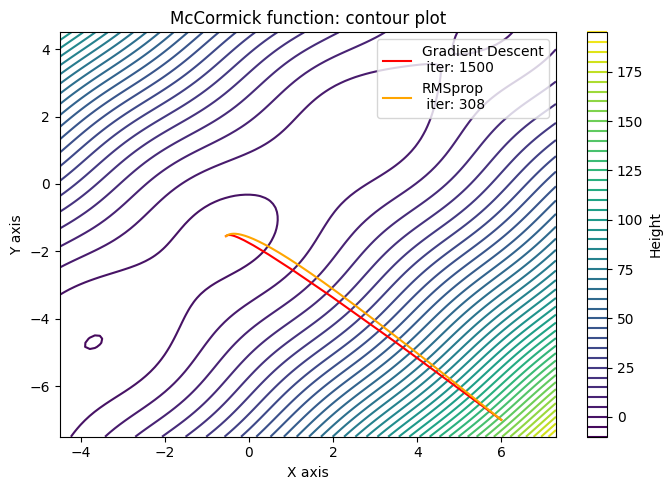

In [121]:
# Countourplot
fig, ax = plt.subplots(figsize=(7, 5))

# intialize x,y,z
x = np.linspace(-4.5, 7.3, 100)
y = np.linspace(-7.5, 4.5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Second subplot for 2D contour plot
contour = ax.contour(x, y, z, levels=40, cmap='viridis')
ax.set_title('McCormick function: contour plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.colorbar(contour, ax=ax, orientation='vertical', label='Height')

# starting point
xs = 6
ys = -7

# parameters
max_iter = 1500
lr = 0.1 # good default

# Gradient Descent
x_gd, y_gd, z_gd, iter_steps_gd = gradient_descent(xs, ys, lr, max_iter)
ax.plot(x_gd, y_gd, color='r', label='Gradient Descent\n iter: {}'.format(iter_steps_gd))

# RMSprop
x_rmsprop, y_rmsprop, z_rmsprop,iter_steps_rmsprop = rmsprop(xs, ys, lr, max_iter)
ax.plot(x_rmsprop, y_rmsprop, color='orange', label='RMSprop\n iter: {}'.format(iter_steps_rmsprop))

plt.legend()
plt.tight_layout()
plt.show()

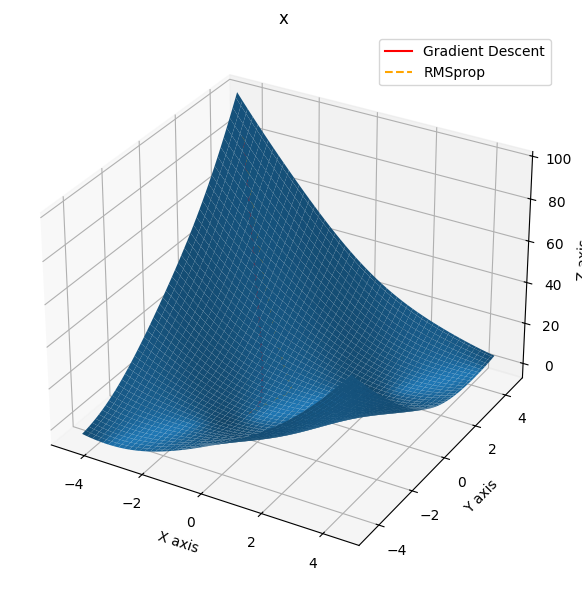

In [58]:
# 3D Visualization

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111, projection='3d')

ax1.plot_surface(x, y, z, color=None, edgecolor='none')
ax1.set_title('x')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
#ax1.set_zscale('log')  # Set the z-axis to logarithmic scale


z_gd = [value + 1 for value in z_gd]
z_rmsprop = [value + 1 for value in z_rmsprop]

# Gradient Descent
ax1.plot(x_gd, y_gd, z_gd, color='r', label='Gradient Descent')



# Gradient Descent with adaptive learning rate
ax1.plot(x_rmsprop, y_rmsprop, z_rmsprop, color='orange', linestyle='dashed', label='RMSprop')

plt.legend()
plt.tight_layout()
plt.show()